# Imports
Importando bibliotecas necessárias

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Carregando os dados

In [ ]:
# Carregar os dados
dados = pd.read_csv('v4.csv')

In [ ]:
dados.columns

Index(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'CO_MUNICIPIO_NASCIMENTO',
       ...
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q022', 'Q024', 'Q025',
       'MEDIA_NOTAS', 'STATUS'],
      dtype='object', length=102)

## Selecionando e tratando colunas

In [ ]:
# Selecionar colunas relevantes
colunas_relevantes = [
    'TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ESCOLA','TP_ENSINO', 'TP_NACIONALIDADE',
    'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
    'TP_ANO_CONCLUIU', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'MEDIA_NOTAS', 'STATUS', 'Q001', 'Q002', 'Q003' , 'Q004', 'Q005',
    'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
    'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q022', 'Q024', 'Q025'
]
dados = dados[colunas_relevantes]

In [ ]:
# Tratar valores ausentes
dados.fillna(0, inplace=True)

In [ ]:
dados['TP_SEXO'] = dados['TP_SEXO'].astype('category').cat.codes
dados['STATUS'] = dados['STATUS'].astype('category').cat.codes
dados['Q003'] = dados['Q003'].astype('category').cat.codes
dados['Q004'] = dados['Q004'].astype('category').cat.codes
dados['Q025']= dados['Q025'].astype('category').cat.codes


In [ ]:
dados['STATUS'].value_counts()

,count
STATUS,
1,873211
0,8519


# Balanceando a amostra

In [ ]:
# Separar classes
dados_reprovados = dados[dados['STATUS'] == 1]  # Classe REPROVADO
dados_aprovados = dados[dados['STATUS'] == 0]  # Classe APROVADO

# Undersampling dos reprovados
dados_reprovados_downsampled = resample(
    dados_reprovados,
    replace=False,  # Não permite duplicação
    n_samples=len(dados_aprovados),  # Igual ao número de aprovados
    random_state=42
)

# Combinar novamente as classes balanceadas
dados_balanceados = pd.concat([dados_reprovados_downsampled, dados_aprovados])


In [ ]:
dados_balanceados['STATUS'].value_counts()

,count
STATUS,
1,8519
0,8519


In [ ]:
dados_balanceados.head(5)

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_NACIONALIDADE,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q022,Q024,Q025
349607,0,1,1,1,3,1.0,1,4.0,1.0,1.0,...,1,1,0,1,1,1,2,4,2,1
292875,1,1,1,1,2,1.0,1,2.0,1.0,1.0,...,0,0,0,1,0,0,1,2,0,1
752864,1,1,2,1,2,1.0,1,2.0,1.0,1.0,...,1,1,1,1,0,0,1,4,1,1
351306,0,1,3,1,3,1.0,1,4.0,1.0,1.0,...,1,1,0,1,0,0,2,3,1,1
574218,0,1,1,1,2,1.0,1,2.0,1.0,1.0,...,1,1,1,1,0,1,3,4,2,1


In [ ]:
dados_balanceados.dtypes

,0
TP_SEXO,int8
TP_ESTADO_CIVIL,int64
TP_COR_RACA,int64
TP_NACIONALIDADE,int64
TP_ESCOLA,int64
TP_ENSINO,float64
TP_NACIONALIDADE,int64
TP_DEPENDENCIA_ADM_ESC,float64
TP_LOCALIZACAO_ESC,float64
TP_SIT_FUNC_ESC,float64


In [ ]:
dados_numericos = dados_balanceados.select_dtypes(include=['float64', 'int64', 'int8'])

# Normalizando os dados
A normalização é necessária para que todas as colunas tenham o mesmo peso no cálculo de k-means

In [ ]:
# normalizando os dados para que todas as colunas tenham o mesmo peso no cálculo
scaler = StandardScaler()
dados_numericos_normalizados = scaler.fit_transform(dados_numericos)

# Transformar de volta em DataFrame, se necessário:
dados_normalizados_df = pd.DataFrame(dados_numericos_normalizados, columns=dados_numericos.columns)

In [ ]:
dados_normalizados_df.head(5)

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_NACIONALIDADE,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q022,Q024,Q025
0,-1.016929,0.044375,-0.764964,0.0,1.076266,-0.039094,0.0,0.955973,-0.142266,-0.051177,...,0.433448,0.448468,-0.527764,0.595384,2.786088,1.153180,0.117154,1.043816,0.60772,0.362203
1,0.983353,0.044375,-0.764964,0.0,-0.929138,-0.039094,0.0,-0.857518,-0.142266,-0.051177,...,-1.066063,-1.790323,-0.527764,0.595384,-0.340393,-0.867167,-0.823499,-0.860412,-1.14740,0.362203
2,0.983353,0.044375,0.208408,0.0,-0.929138,-0.039094,0.0,-0.857518,-0.142266,-0.051177,...,0.433448,0.448468,1.788577,0.595384,-0.340393,-0.867167,-0.823499,1.043816,-0.26984,0.362203
3,-1.016929,0.044375,1.181781,0.0,1.076266,-0.039094,0.0,0.955973,-0.142266,-0.051177,...,0.433448,0.448468,-0.527764,0.595384,-0.340393,-0.867167,0.117154,0.091702,-0.26984,0.362203
4,-1.016929,0.044375,-0.764964,0.0,-0.929138,-0.039094,0.0,-0.857518,-0.142266,-0.051177,...,0.433448,0.448468,1.788577,0.595384,-0.340393,1.153180,1.057807,1.043816,0.60772,0.362203


# K-means - Método do Cotovelo

In [ ]:
# Testar diferentes valores de k para o método cotovelo
inertia = []
k_values = range(1, 11)  # Testar k de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados_df)
    inertia.append(kmeans.inertia_)


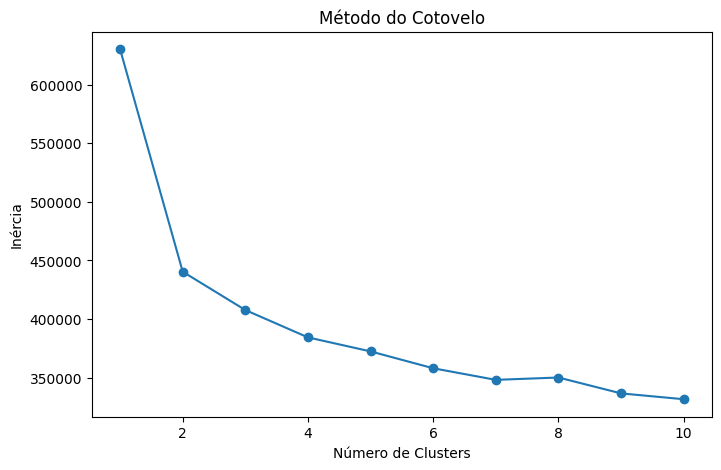

In [ ]:
# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
## célula para o método da silhueta

#import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import StandardScaler

## Testar diferentes valores de k para o método da silhueta
#silhouette_scores = []
#k_values = range(2, 6)  # Testar k de 2 a 10
#for k in k_values:
#    kmeans = KMeans(n_clusters=k, random_state=42)
#    kmeans.fit(dados_normalizados_df)
#    cluster_labels = kmeans.labels_
#    score = silhouette_score(dados_normalizados_df, cluster_labels)
#    silhouette_scores.append(score)

## Plotar o gráfico da pontuação da silhueta
#plt.figure(figsize=(8, 5))
#plt.plot(k_values, silhouette_scores, marker='o')
#plt.xlabel('Número de clusters (k)')
#plt.ylabel('Pontuação da Silhueta')
#plt.title('Método da Silhueta')
#plt.grid(True)
#plt.show()

## Exibir o melhor k
#melhor_k = k_values[np.argmax(silhouette_scores)]
#print(f"O melhor número de clusters (k) é: {melhor_k}")

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(dados_normalizados_df)

# Adicionando os clusters ao dataset

In [ ]:
dados_balanceados['cluster'] = clusters

In [ ]:
dados_balanceados.to_csv('dados_com_clusters.csv', index=False)

In [ ]:
dados_balanceados.head(5)

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_NACIONALIDADE,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,Q014,Q015,Q016,Q017,Q018,Q019,Q022,Q024,Q025,cluster
349607,0,1,1,1,3,1.0,1,4.0,1.0,1.0,...,1,0,1,1,1,2,4,2,1,4
292875,1,1,1,1,2,1.0,1,2.0,1.0,1.0,...,0,0,1,0,0,1,2,0,1,2
752864,1,1,2,1,2,1.0,1,2.0,1.0,1.0,...,1,1,1,0,0,1,4,1,1,0
351306,0,1,3,1,3,1.0,1,4.0,1.0,1.0,...,1,0,1,0,0,2,3,1,1,0
574218,0,1,1,1,2,1.0,1,2.0,1.0,1.0,...,1,1,1,0,1,3,4,2,1,3


In [ ]:
print(dados_balanceados['cluster'].value_counts(normalize=True))  # verificando quantos alunos em cada cluster

cluster
1    0.219098
3    0.217162
0    0.175021
2    0.170384
6    0.102125
4    0.096490
5    0.019721
Name: proportion, dtype: float64


# Analisando os Clusters

In [ ]:
# Comparar clusters em relação à variável-alvo
df_medias = dados_balanceados.groupby('cluster').mean()

In [ ]:
#colunas consideradas
colunas = ['TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_ANO_CONCLUIU', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q022', 'Q024', 'Q025']

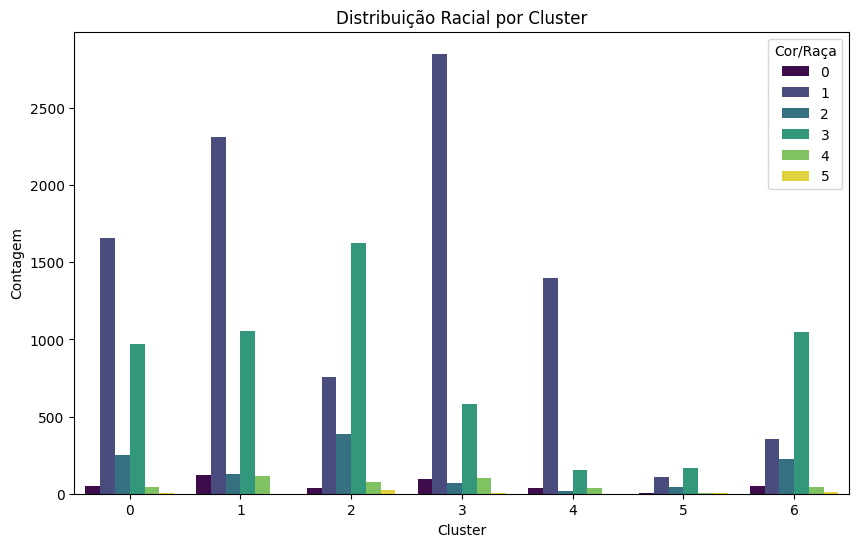

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar a contagem de cada raça por cluster
distribuicao_racial = dados_balanceados.groupby(['cluster', 'TP_COR_RACA']).size().reset_index(name='count')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=distribuicao_racial, x='cluster', y='count', hue='TP_COR_RACA', palette='viridis')
plt.title('Distribuição Racial por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Cor/Raça')
plt.show()

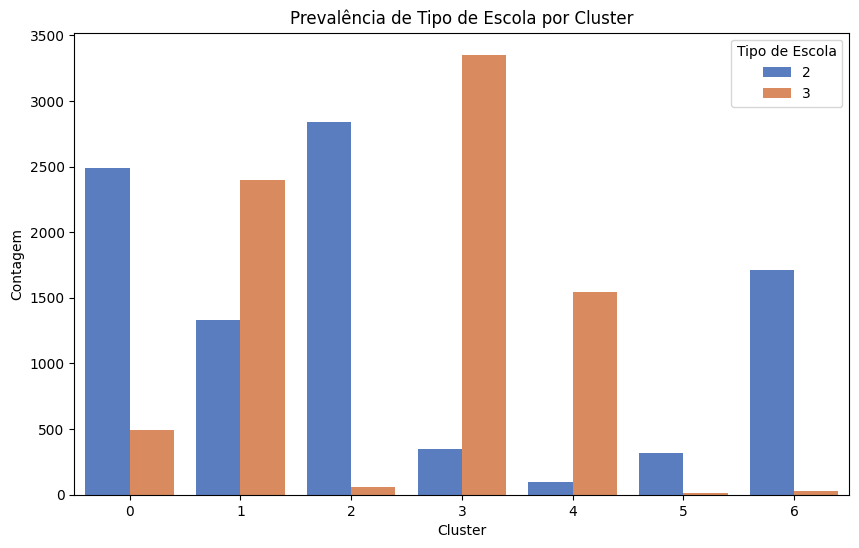

In [ ]:
# Verificar a contagem do tipo de escola por cluster
tipo_escola = dados_balanceados.groupby(['cluster', 'TP_ESCOLA']).size().reset_index(name='count')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=tipo_escola, x='cluster', y='count', hue='TP_ESCOLA', palette='muted')
plt.title('Prevalência de Tipo de Escola por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Escola')
plt.show()


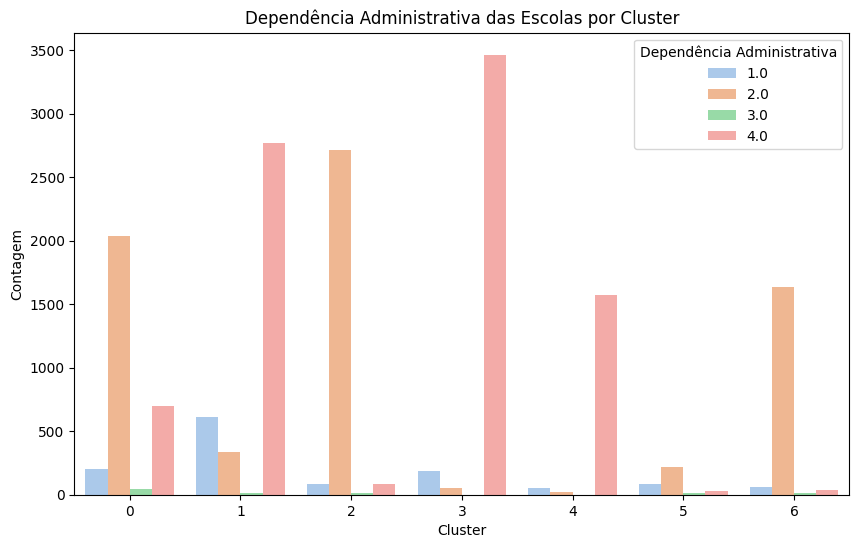

In [ ]:
# Verificar a contagem da dependência administrativa por cluster
dependencia_adm = dados_balanceados.groupby(['cluster', 'TP_DEPENDENCIA_ADM_ESC']).size().reset_index(name='count')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=dependencia_adm, x='cluster', y='count', hue='TP_DEPENDENCIA_ADM_ESC', palette='pastel')
plt.title('Dependência Administrativa das Escolas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Dependência Administrativa')
plt.show()


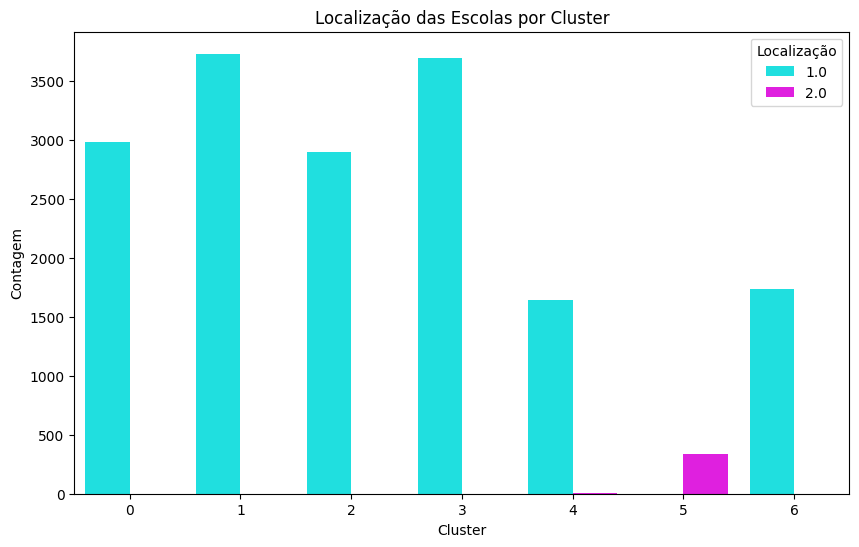

In [ ]:
# Verificar a contagem da localização das escolas por cluster
localizacao_esc = dados_balanceados.groupby(['cluster', 'TP_LOCALIZACAO_ESC']).size().reset_index(name='count')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=localizacao_esc, x='cluster', y='count', hue='TP_LOCALIZACAO_ESC', palette='cool')
plt.title('Localização das Escolas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Localização')
plt.show()


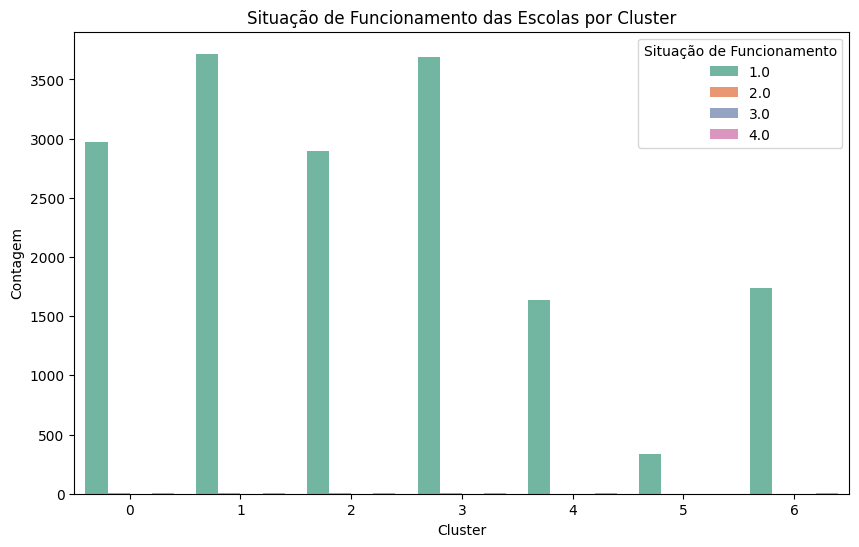

In [ ]:
# Verificar a contagem da situação de funcionamento das escolas por cluster
sit_func = dados_balanceados.groupby(['cluster', 'TP_SIT_FUNC_ESC']).size().reset_index(name='count')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=sit_func, x='cluster', y='count', hue='TP_SIT_FUNC_ESC', palette='Set2')
plt.title('Situação de Funcionamento das Escolas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Situação de Funcionamento')
plt.show()


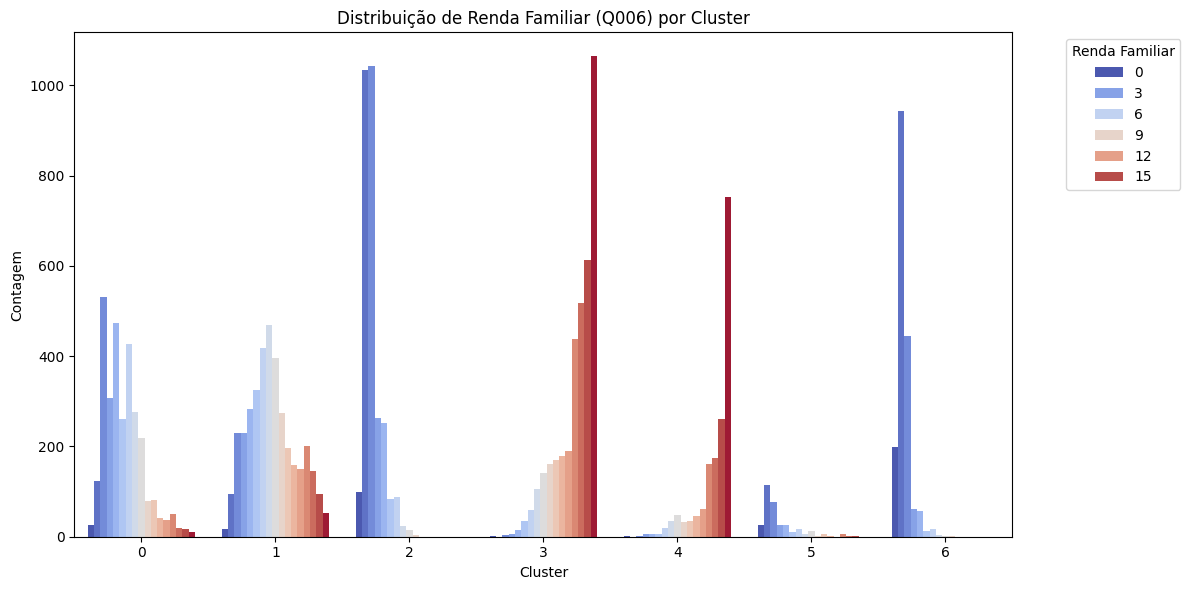

In [ ]:
# Verificar a contagem de renda familiar por cluster
renda_familiar = dados_balanceados.groupby(['cluster', 'Q006']).size().reset_index(name='count')

# Plotar gráfico de barras para renda familiar por cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=renda_familiar, x='cluster', y='count', hue='Q006', palette='coolwarm')
plt.title('Distribuição de Renda Familiar (Q006) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Renda Familiar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


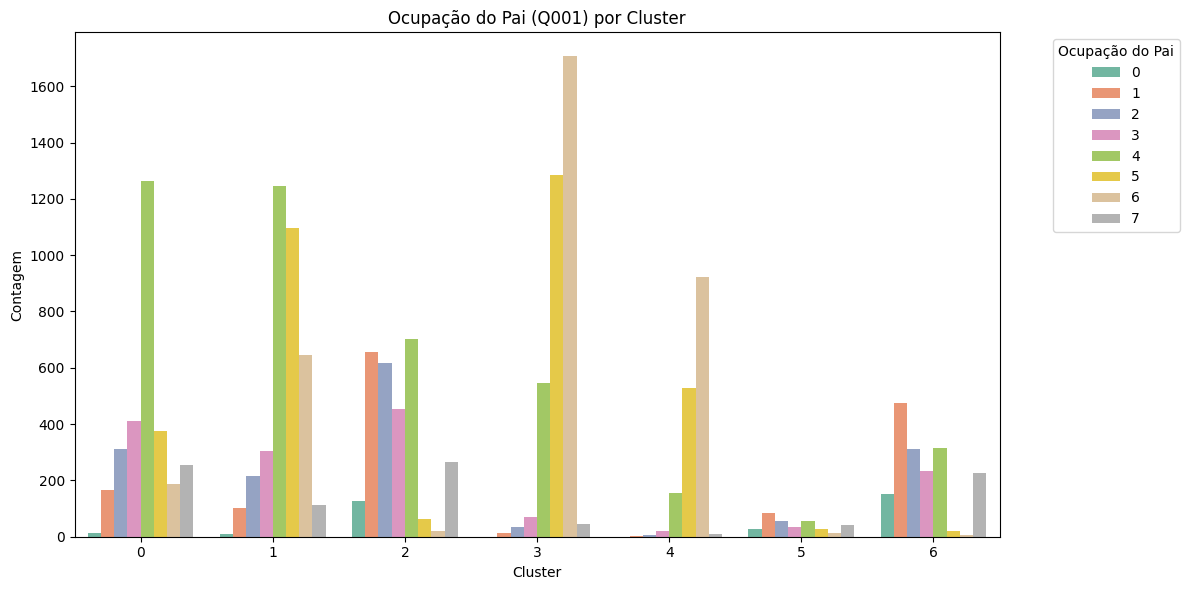

In [ ]:
# Ocupação do pai
ocupacao_pai = dados_balanceados.groupby(['cluster', 'Q001']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=ocupacao_pai, x='cluster', y='count', hue='Q001', palette='Set2')
plt.title('Ocupação do Pai (Q001) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Ocupação do Pai', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


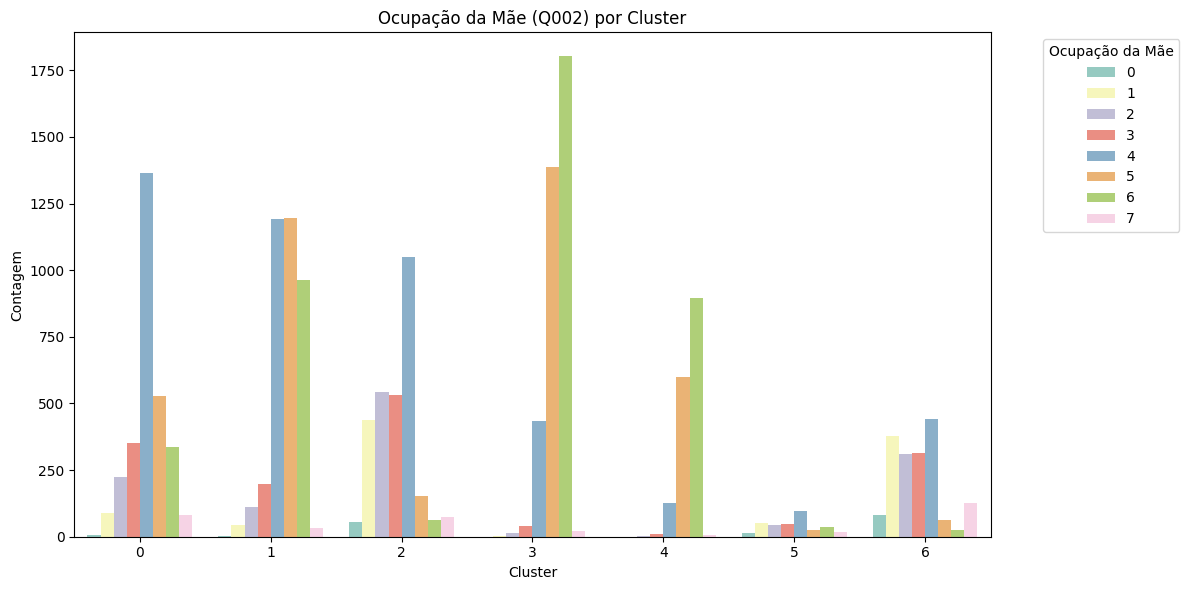

In [ ]:
# Ocupação da mãe
ocupacao_mae = dados_balanceados.groupby(['cluster', 'Q002']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=ocupacao_mae, x='cluster', y='count', hue='Q002', palette='Set3')
plt.title('Ocupação da Mãe (Q002) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Ocupação da Mãe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Preparando Dados para Treinamento

In [ ]:
# separando os dados em x (características) e y (alvo)
x = dados_balanceados.drop(columns=['STATUS', 'cluster', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE',
                                    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                    'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'MEDIA_NOTAS'])  # colunas que foram excluídas e não vão ser usadas como features
y = dados_balanceados['STATUS']


In [ ]:
x.columns

Index(['TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_ANO_CONCLUIU', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q022', 'Q024', 'Q025'],
      dtype='object')

In [ ]:
# célula para separar dados de treino e teste
from sklearn.model_selection import train_test_split

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y) #o stratify = y mantém o equilíbrio entre as classes

# treino e validação (feita depois do teste, como segunda avaliação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#célula para verificar correlação

#correlations = pd.concat([X_train, y_train], axis=1).corr()
#print(correlations['STATUS'].sort_values(ascending=False))


In [ ]:
# verificando se há dados que pertencem tanto ao grupo de treino quanto ao grupo de teste. o resultado aqui deve ser vazio
print(set(X_train.index).intersection(set(X_test.index)))

set()


In [ ]:
#treinando o modelo com árvore de decisão
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
#célula para mostrar a árvore de decisão gerada

#from sklearn.tree import export_text
#tree_rules = export_text(clf, feature_names=list(X_train.columns))
#print(tree_rules)

# Avaliando o Modelo

In [ ]:
#avaliando o modelo
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2556
           1       0.85      0.82      0.84      2556

    accuracy                           0.84      5112
   macro avg       0.84      0.84      0.84      5112
weighted avg       0.84      0.84      0.84      5112



In [ ]:
#sendo X_val o conjunto de validação, aqui avaliamos o modelo com esse conjunto
y_val_pred = clf.predict(X_val)

print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1184
           1       0.85      0.83      0.84      1202

    accuracy                           0.84      2386
   macro avg       0.84      0.84      0.84      2386
weighted avg       0.84      0.84      0.84      2386

